1. Behaviour or characteristics of users

Based on the analysis below, the users who check out on average have longer time spent and more pages visited.  These are confirmed by the hypothesis testing performed at the end. 

The average ages, average number of cart items, and total cart value are similar regardless the customer has checked out or not. There is also no obvious relatonship between checkout and number of session.

Further, customer who is using desktop has higher check out rate. Location 1 and Location 4 also have a higher check out rate.

2. Data cleaning and preparation approaches

First, we check for the missing value who appears under location and device.  We've droped those missing value since it doesn't impact the mean, median and average.  Further, it represents less than 5% of the data (i.e. 250 rows) and hence considered immaterial

Then, we check for any duplicate value, which does not exist in this dataset. After than, we check for the outlier by looking at the boxplt by each variables. Further, we review the outlier by checkout / no-checkout customers to ensure the underlying distribution is not distorted. There is not material change in mean, median and std after the droping those outliers.

For categorical variables like device and location, we've looked at the distribution by checkout / non-checkout customers and see if there is any material difference.

Lastly, we perform the scatter plot to see if there are obvious on the behaviour of checkout and noncheckout client.

3. Recommendations for product team

Reommendation 1: Put the buttons in the website for customer browse through different pages easily

The objective of this recommendation is to increase the number of page visited by customer which would increase the chance of customer to checkout. This is because the checkout customer has statistically higher number of page visited. Thsi can be done by putting floating button at each sides of the browser to improve the ease of switching pages.

Recommendation 2: Increase the animation and colorful pictures in each product

Animation and colorful pictures can catch the attention of the customers and result in longer time spent in the website.  This will also increase the checkout rate based on the analysis above. We can implement this by working with different product owners and artists to create these attractive contents in the website.

Recommendation 3: Improve the tablet verson of the website

The analysis shows that tablet has the lowest checkout rate which indicate that the interface in tablet device has room to improve. This can be done by referencing the desktop version of the websites which have the highest checkout rate.

Recommendation 4: Increase the discount and promotion in location 2, 3, 5

The checkout rate in these three locations are 1-2% lower. Discount and induce the customer to checkout more in the websites and build up the online shopping experience in these locations.

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv(r"C:\Users\samue\Downloads\midterm_data.csv")

In [219]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Missing value identified under device and location column, which account for less than 5%. Suggest to drop the data given the missing volume is immaterial.

In [221]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Findings:
1. 3 unique value under device and 5 unique value under location.
2. Outliers in time spent and cart value based on the standard deviation.  Will revisit based on the boxplot after cleaning the missing value.

In [222]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [223]:
df[df['device'].isnull() & ~df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
79,80,38,8,16.074280,1,8,69.84,0,NaN,Location 4
136,137,61,1,25.418891,6,20,140.39,1,NaN,Location 4
249,250,21,1,5.000000,1,5,41.39,0,NaN,Location 1
287,288,35,3,27.292828,6,23,236.13,0,NaN,Location 4
290,291,20,2,37.307904,9,15,157.54,1,NaN,Location 1
...,...,...,...,...,...,...,...,...,...,...
4686,4687,35,5,45.000000,10,6,88.63,0,NaN,Location 4
4689,4690,29,2,8.648351,2,13,125.84,0,NaN,Location 5
4763,4764,55,1,35.940041,6,18,211.00,1,NaN,Location 4
4802,4803,19,9,15.044741,3,24,283.49,0,NaN,Location 4


In [224]:
df[~df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
59,60,33,4,26.020972,6,17,121.32,1,Desktop,NaN
202,203,47,7,31.185720,6,21,203.65,0,Desktop,NaN
373,374,44,8,17.284851,3,6,45.42,0,Mobile,NaN
915,916,34,5,44.456958,12,10,114.31,0,Mobile,NaN
925,926,21,8,25.241298,5,13,154.60,1,Desktop,NaN
1024,1025,29,7,21.590777,5,17,111.98,0,Desktop,NaN
1146,1147,50,9,14.580795,3,18,195.44,0,Desktop,NaN
1459,1460,61,8,21.810562,5,20,213.12,0,Desktop,NaN
1585,1586,39,5,18.592650,4,16,169.93,0,Mobile,NaN
1595,1596,44,2,8.551168,2,18,190.21,0,Desktop,NaN


In [225]:
df.groupby('checkout_status')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
checkout_status,,,,,,,,
0,3638.0,152.669915,74.841744,20.41,85.6075,147.155,209.5375,427.40
1,1362.0,140.824214,47.654924,43.22,103.3575,136.290,174.3750,313.76


In [226]:
df_test = df.copy()

df_test.dropna(subset=['location'], axis=0, inplace=True)
df_test.groupby('checkout_status')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
checkout_status,,,,,,,,
0,3616.0,152.661009,74.949552,20.41,85.5675,147.025,209.6775,427.40
1,1354.0,140.725886,47.669413,43.22,103.1175,136.180,174.3750,313.76


No material change in mean, median and std after droping the missing location. Hence proceed to drop the missing location data.

In [227]:
df.dropna(subset=['location'], axis=0, inplace=True)
df.groupby('checkout_status')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
checkout_status,,,,,,,,
0,3616.0,152.661009,74.949552,20.41,85.5675,147.025,209.6775,427.40
1,1354.0,140.725886,47.669413,43.22,103.1175,136.180,174.3750,313.76


In [228]:
df_test2 = df.copy()

df_test2.dropna(subset=['device'], axis=0, inplace=True)
df_test2.groupby('checkout_status')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
checkout_status,,,,,,,,
0,3539.0,152.827485,74.971948,20.41,85.615,147.15,209.740,427.40
1,1332.0,140.510871,47.683980,43.22,102.810,135.83,174.365,313.76


No material change in mean, median and std after droping the missing device. Hence proceed to drop the missing device data.

In [229]:
df.dropna(subset=['device'], axis=0, inplace=True)
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000
max,5000.000000,65.00000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


After cleaning the missing data, the next step is to find the duplicates. There is no duplicated row based on the below results. We can then check for the outliers.

In [230]:
df[df.duplicated()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


<Axes: xlabel='checkout_status', ylabel='age'>

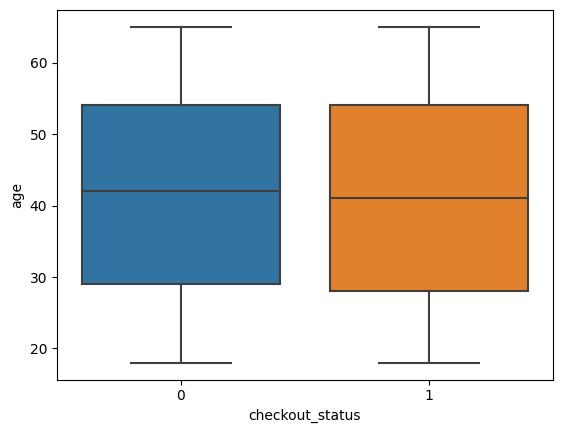

In [231]:
sns.boxplot(df, y='age', x='checkout_status')

No outliers in the age regardless of the customer check-out or not.  Further, the range and median and both group are close to each other, which indicates that age may not be a determining factor.

<Axes: xlabel='checkout_status', ylabel='sessions'>

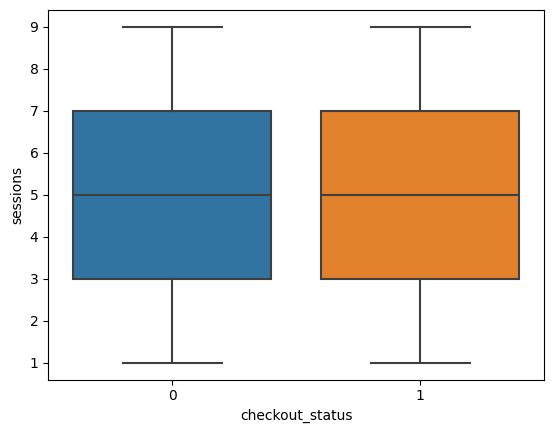

In [232]:
sns.boxplot(df, y='sessions', x='checkout_status')

Similar to age, there is no outliers in the sessions.

<Axes: xlabel='checkout_status', ylabel='time_spent'>

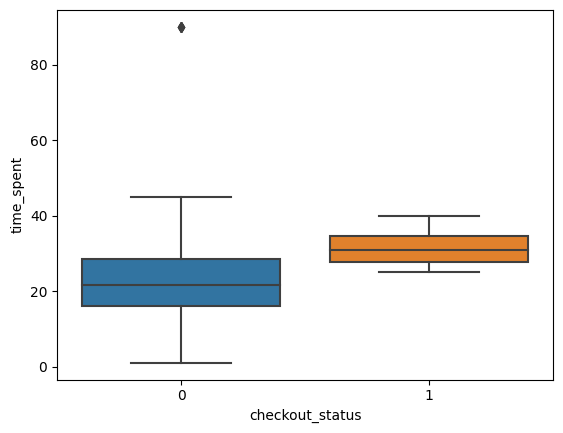

In [233]:
sns.boxplot(df, y='time_spent', x='checkout_status')

Outliers are noted in the time spent and hence will remove it to avoid distortion.

In [234]:
df[df['time_spent'] > 80]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


In [235]:
df_test3 = df.copy()
df_test3.drop(df[df['time_spent'] > 80].index, axis=0, inplace=True)
df_test3.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000
mean,2503.342100,41.541607,5.024450,25.118758,5.772344,14.971440,149.455543,0.273680
std,1445.794209,14.044044,2.589622,9.648355,2.561041,6.055725,68.824802,0.445892
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.500000,29.000000,3.000000,18.289789,4.000000,10.000000,92.415000,0.000000
50%,2505.000000,42.000000,5.000000,25.052740,6.000000,15.000000,142.960000,0.000000
75%,3760.500000,54.000000,7.000000,31.977536,8.000000,20.000000,198.550000,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,427.400000,1.000000


Median remains at 25 for time spent, hence proceed to drop the outliers.

In [236]:
df.drop(df[df['time_spent'] > 80].index, axis=0, inplace=True)

<Axes: xlabel='checkout_status', ylabel='pages_visited'>

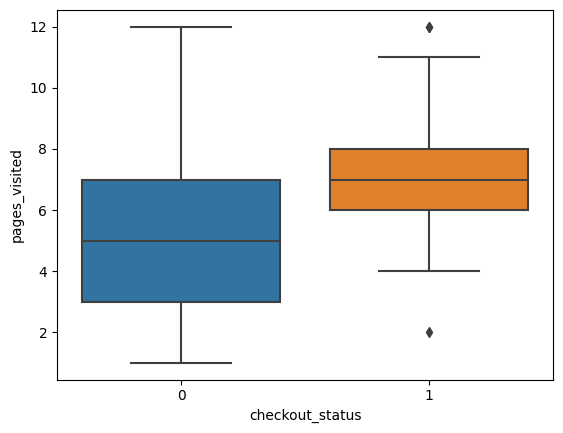

In [237]:
sns.boxplot(df, y='pages_visited', x='checkout_status')

In [238]:
df_test4 = df.copy()
lower = np.percentile(df_test4[df_test4['checkout_status']==1]['pages_visited'],25)
upper = np.percentile(df_test4[df_test4['checkout_status']==1]['pages_visited'],75)
IQR = upper - lower
outliers = df_test4[((df_test4['pages_visited']<lower - 1.5*(IQR))|(df_test4['pages_visited']>upper + 1.5*(IQR))) & df_test4['checkout_status']==1]

df_test4.drop(outliers.index, axis=0).describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,2503.763569,41.544613,5.024877,25.112842,5.770559,14.971423,149.465831,0.273232
std,1445.676021,14.044334,2.589385,9.647049,2.558143,6.057152,68.841214,0.445665
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1252.750000,29.000000,3.000000,18.285964,4.000000,10.000000,92.397500,0.000000
50%,2505.500000,42.000000,5.000000,25.047650,6.000000,15.000000,142.990000,0.000000
75%,3760.250000,54.000000,7.000000,31.968836,8.000000,20.000000,198.632500,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,427.400000,1.000000


No material impact on mean, median and std after droping the outliers on pages_visited, hence proceed to drop them.

In [239]:
lower = np.percentile(df[df['checkout_status']==1]['pages_visited'],25)
upper = np.percentile(df[df['checkout_status']==1]['pages_visited'],75)
IQR = upper - lower
outliers = df[((df['pages_visited']<lower - 1.5*(IQR))|(df['pages_visited']>upper + 1.5*(IQR))) & df['checkout_status']==1]

df.drop(outliers.index, axis=0).describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,2503.763569,41.544613,5.024877,25.112842,5.770559,14.971423,149.465831,0.273232
std,1445.676021,14.044334,2.589385,9.647049,2.558143,6.057152,68.841214,0.445665
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1252.750000,29.000000,3.000000,18.285964,4.000000,10.000000,92.397500,0.000000
50%,2505.500000,42.000000,5.000000,25.047650,6.000000,15.000000,142.990000,0.000000
75%,3760.250000,54.000000,7.000000,31.968836,8.000000,20.000000,198.632500,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,427.400000,1.000000


<Axes: xlabel='checkout_status', ylabel='cart_items'>

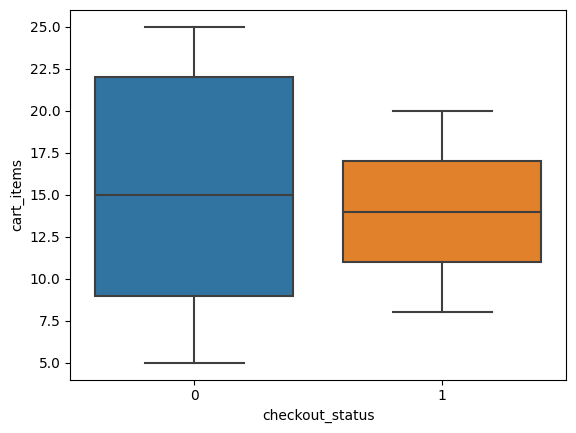

In [240]:
sns.boxplot(df, y='cart_items', x='checkout_status')

<Axes: xlabel='checkout_status', ylabel='cart_value'>

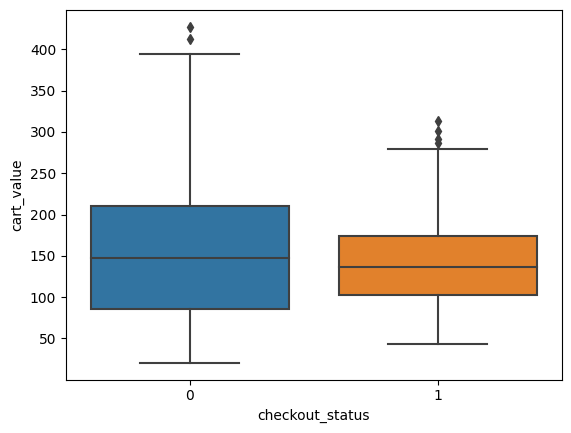

In [241]:
sns.boxplot(df, y='cart_value', x='checkout_status')

Similarly, remove the outliers of the cart_value based on the box plot.

In [242]:
lower = np.percentile(df[df['checkout_status']==1]['cart_value'],25)
upper = np.percentile(df[df['checkout_status']==1]['cart_value'],75)
IQR = upper - lower
outliers = df[((df['cart_value']<lower - 1.5*(IQR))|(df['cart_value']>upper + 1.5*(IQR))) & df['checkout_status']==1]

df.drop(outliers.index, axis=0, inplace=True)
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,2503.117829,41.548016,5.024676,25.111781,5.771129,14.967304,149.333200,0.273082
std,1445.888184,14.039702,2.590248,9.648789,2.561392,6.056497,68.720043,0.445589
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.500000,29.000000,3.000000,18.283300,4.000000,10.000000,92.395000,0.000000
50%,2504.000000,42.000000,5.000000,25.046352,6.000000,15.000000,142.920000,0.000000
75%,3760.500000,54.000000,7.000000,31.965510,8.000000,20.000000,198.390000,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,427.400000,1.000000


In [243]:
df.drop(df[df['cart_value'] > 400].index, axis=0, inplace=True)
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000
mean,2502.919358,41.549681,5.025303,25.109557,5.770829,14.963382,149.221732,0.273195
std,1446.145933,14.039680,2.590577,9.649907,2.561856,6.054646,68.513860,0.445646
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.000000,29.000000,3.000000,18.277972,4.000000,10.000000,92.390000,0.000000
50%,2503.000000,42.000000,5.000000,25.038151,6.000000,15.000000,142.830000,0.000000
75%,3761.000000,54.000000,7.000000,31.963934,8.000000,20.000000,198.290000,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,394.770000,1.000000


Text(0.5, 1.0, '')

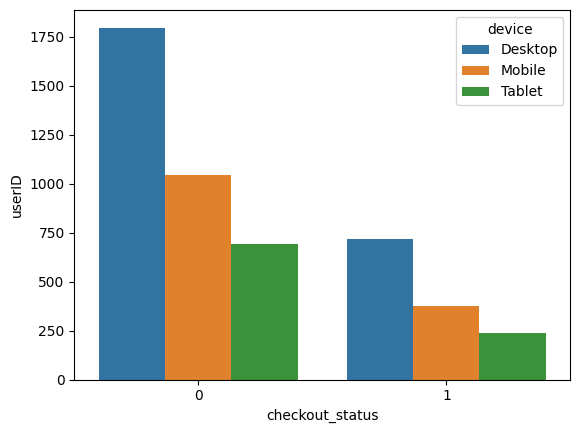

In [244]:
device = df.groupby(['device','checkout_status'], as_index=False)['userID'].count()
sns.barplot(data=device, x = "checkout_status", y = 'userID', hue="device")
plt.title("")

Text(0.5, 1.0, '')

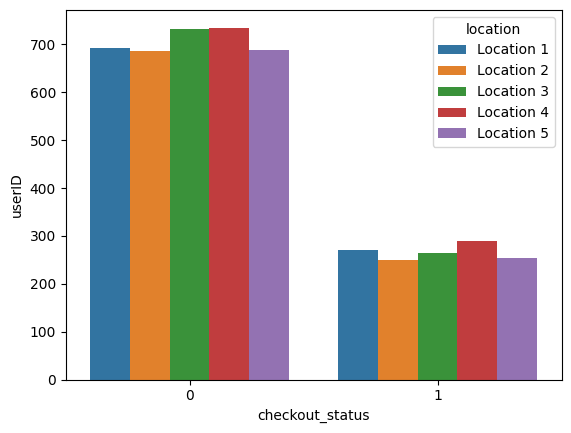

In [245]:
location = df.groupby(['location','checkout_status'], as_index=False)['userID'].count()
sns.barplot(data=location, x = "checkout_status", y = 'userID', hue="location")
plt.title("")

The distribution by location and device are similar between the two group of customers. No irregularity is noted.
Based on the above code, the data is considered as cleaned and hence can proceed to exploratory analysis.

First, we want to find out whether the check out rate is higher for difference deivce. It shows that desktop has higher checkout rate.

In [247]:
pivot = pd.DataFrame(pd.pivot_table(device, 'userID', 'device', 'checkout_status'))
pivot['rate'] = pivot[1] / (pivot[0] + pivot[1])
pivot

checkout_status,0,1,rate
device,,,
Desktop,1796,719,0.285885
Mobile,1043,373,0.263418
Tablet,694,236,0.253763


In [258]:
pivot = pd.DataFrame(pd.pivot_table(location, 'userID', 'location', 'checkout_status'))
pivot['rate'] = pivot[1] / (pivot[0] + pivot[1])
pivot

checkout_status,0,1,rate
location,,,
Location 1,693,270,0.280374
Location 2,686,250,0.267094
Location 3,731,265,0.266064
Location 4,735,289,0.282227
Location 5,688,254,0.269639


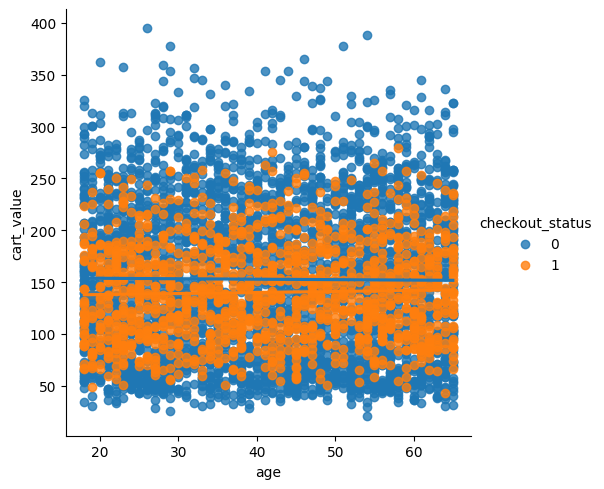

In [248]:
sns.lmplot(data=df, x='age', y='cart_value', hue='checkout_status')

No obvious difference on age distribution.

<Axes: xlabel='sessions', ylabel='cart_value'>

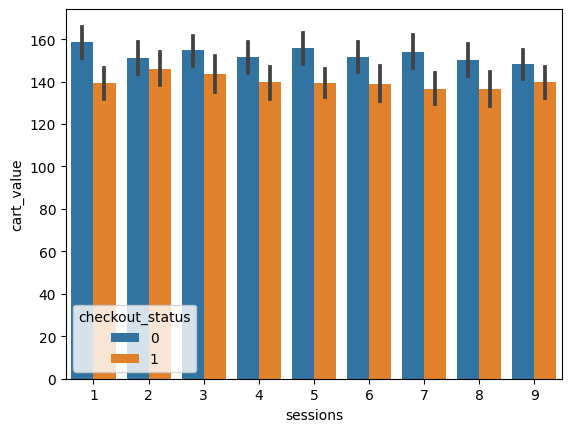

In [249]:
sns.barplot(data=df, x='sessions', y='cart_value', hue='checkout_status')

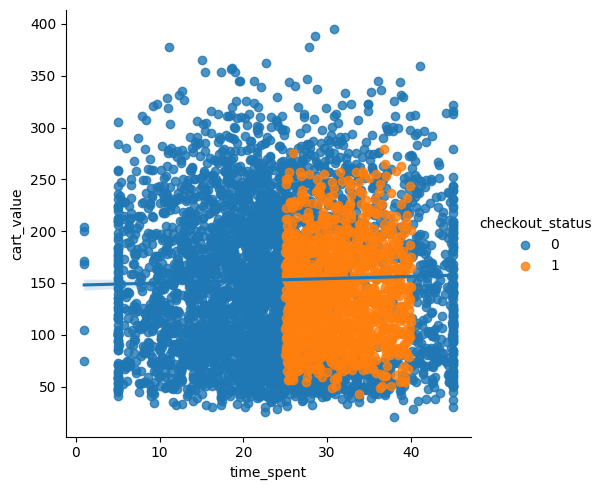

In [250]:
sns.lmplot(data=df, x='time_spent', y='cart_value', hue='checkout_status')

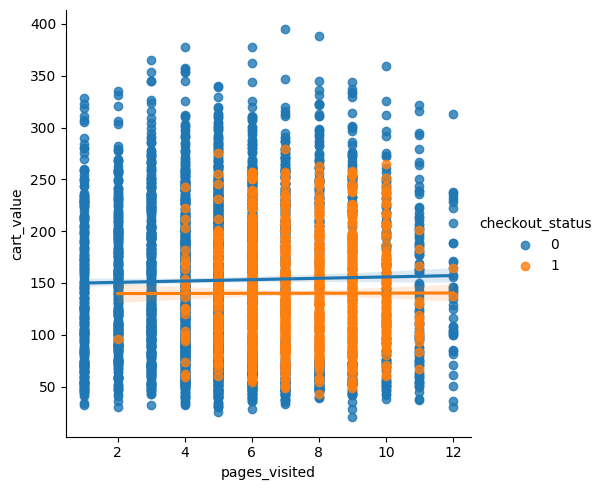

In [251]:
sns.lmplot(data=df, x='pages_visited', y='cart_value', hue='checkout_status')

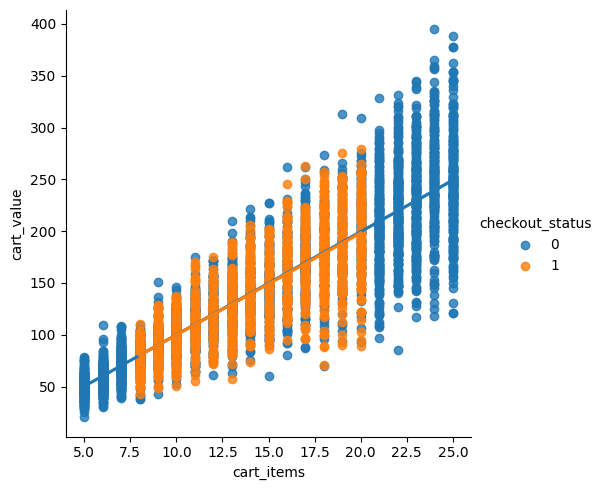

In [253]:
sns.lmplot(data=df, x='cart_items', y='cart_value', hue='checkout_status')

Based on the above graph, we want to perform test on whether the customers checked out have higher time spent and higher pages visited.

In [255]:
from scipy import stats
checkout = df[df['checkout_status'] == 1]['time_spent']
ncheckout = df[df['checkout_status'] == 0]['time_spent']

p_val = stats.ttest_ind(checkout, ncheckout)
print(p_val)

Ttest_indResult(statistic=29.8867658892821, pvalue=2.5597454116762926e-180)


In [256]:
checkout_page = df[df['checkout_status'] == 1]['pages_visited']
ncheckout_page = df[df['checkout_status'] == 0]['pages_visited']

p_val = stats.ttest_ind(checkout_page, ncheckout_page)
print(p_val)

Ttest_indResult(statistic=27.205634593261717, pvalue=7.964434269095731e-152)
